### Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_values=[i for i in range(11)]

In [3]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
#Convert to numpy
x_train=np.array(x_values,dtype=np.float32)
x_train.shape

(11,)

In [6]:
#convert to 2d
x_train=x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [7]:
y_values=[2*i + 1 for i in x_values]

In [8]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [9]:
y_train=np.array(y_values,dtype=np.float32)
y_train.shape

(11,)

In [10]:
#to 2d
y_train=y_train.reshape(-1,1)
y_train.shape

(11, 1)

### Building model

In [12]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [13]:
#create class
class LinearRegressionModel(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegressionModel,self).__init__()
        self.linear=nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out=self.linear(x)
        return out

In [14]:
input_dim=1
output_dim=1
model=LinearRegressionModel(input_dim,output_dim)

In [15]:
#Instantiate Loss Class
criterion=nn.MSELoss()

In [16]:
#Instantiate a optimizer class
learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [17]:
epochs=100

In [22]:
for epoch in range(epochs):
    epoch=epoch+1
    
    #Convert numpy arrays to torch Variables
    inputs=Variable(torch.from_numpy(x_train))
    labels=Variable(torch.from_numpy(y_train))
    
    #Clear gradients w.r.t parameters
    optimizer.zero_grad()
    
    #Forward pass to get output
    outputs=model(inputs)
    
    #Calculate loss
    loss=criterion(outputs,labels)
    
    #Getting gradients w.r.t parameters
    loss.backward()
    
    #updating parameters
    optimizer.step()
    
    epoch_loss=loss.item()
    
    print('epoch {}, loss {}'.format(epoch,epoch_loss))

epoch 1, loss 0.13395993411540985
epoch 2, loss 0.02061394415795803
epoch 3, loss 0.011260561645030975
epoch 4, loss 0.01039064396172762
epoch 5, loss 0.010213932953774929
epoch 6, loss 0.010094918310642242
epoch 7, loss 0.009981810115277767
epoch 8, loss 0.009870287962257862
epoch 9, loss 0.009760118089616299
epoch 10, loss 0.009651077911257744
epoch 11, loss 0.009543302468955517
epoch 12, loss 0.009436754509806633
epoch 13, loss 0.009331366047263145
epoch 14, loss 0.009227191098034382
epoch 15, loss 0.009124132804572582
epoch 16, loss 0.009022235870361328
epoch 17, loss 0.008921478874981403
epoch 18, loss 0.008821876719594002
epoch 19, loss 0.00872336607426405
epoch 20, loss 0.008625957183539867
epoch 21, loss 0.00852966122329235
epoch 22, loss 0.008434372022747993
epoch 23, loss 0.008340196684002876
epoch 24, loss 0.008247073739767075
epoch 25, loss 0.008154958486557007
epoch 26, loss 0.00806389469653368
epoch 27, loss 0.007973825559020042
epoch 28, loss 0.007884836755692959
epoch 2

In [23]:
#Compare Data
predicted=model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 1.110252 ],
       [ 3.0943747],
       [ 5.0784974],
       [ 7.06262  ],
       [ 9.046743 ],
       [11.030867 ],
       [13.014989 ],
       [14.999111 ],
       [16.983234 ],
       [18.967358 ],
       [20.95148  ]], dtype=float32)

In [24]:
#real y vals
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

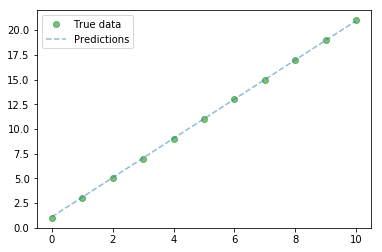

In [25]:
#clear figure
plt.clf()

#get predictions
predicted=model(Variable(torch.from_numpy(x_train))).data.numpy()

#plot true data
plt.plot(x_train,y_train,'go',label='True data',alpha=0.5)

#plot predictions
plt.plot(x_train,predicted,'--',label='Predictions',alpha=0.5)

#Legend and plot
plt.legend(loc='best')
plt.show()

In [26]:
#save model Just saves the parameters
save_model=False
if save_model is True:
    torch.save(model.state_dict(),'awesome_model.pkl')

In [27]:
#load model
load_model=False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))